In [ ]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/swiss.csv")
df.head(10)

,Fertility,Agriculture,Examination,Education,Catholic,InfantMortality
0,80.2,17.0,15,12,9.96,22.2
1,83.1,45.1,6,9,84.84,22.2
2,92.5,39.7,5,5,93.40,20.2
3,85.8,36.5,12,7,33.77,20.3
4,76.9,43.5,17,15,5.16,20.6
5,76.1,35.3,9,7,90.57,26.6
6,83.8,70.2,16,7,92.85,23.6
7,92.4,67.8,14,8,97.16,24.9
8,82.4,53.3,12,7,97.67,21.0
9,82.9,45.2,16,13,91.38,24.4


In [ ]:
df.describe()

,Fertility,Agriculture,Examination,Education,Catholic,InfantMortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


<Axes: >

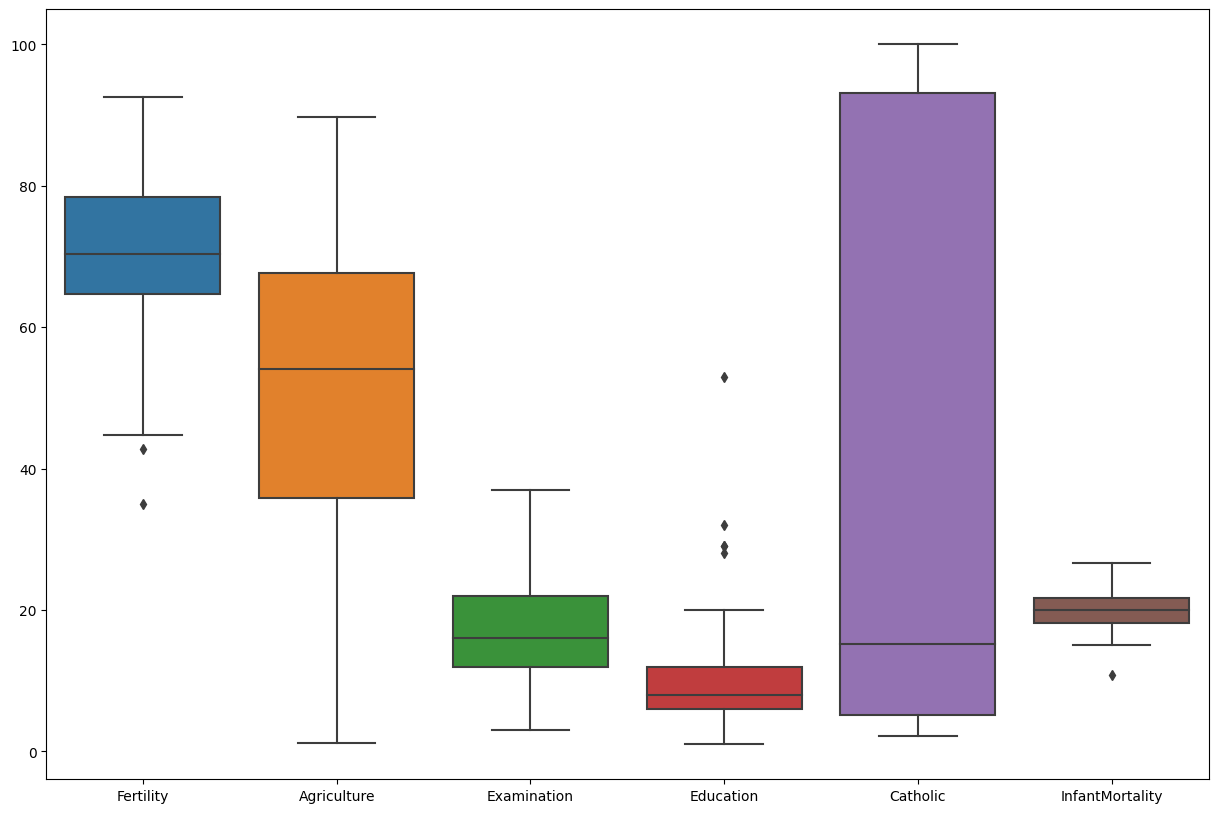

In [ ]:
#Boxplot Visualization
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

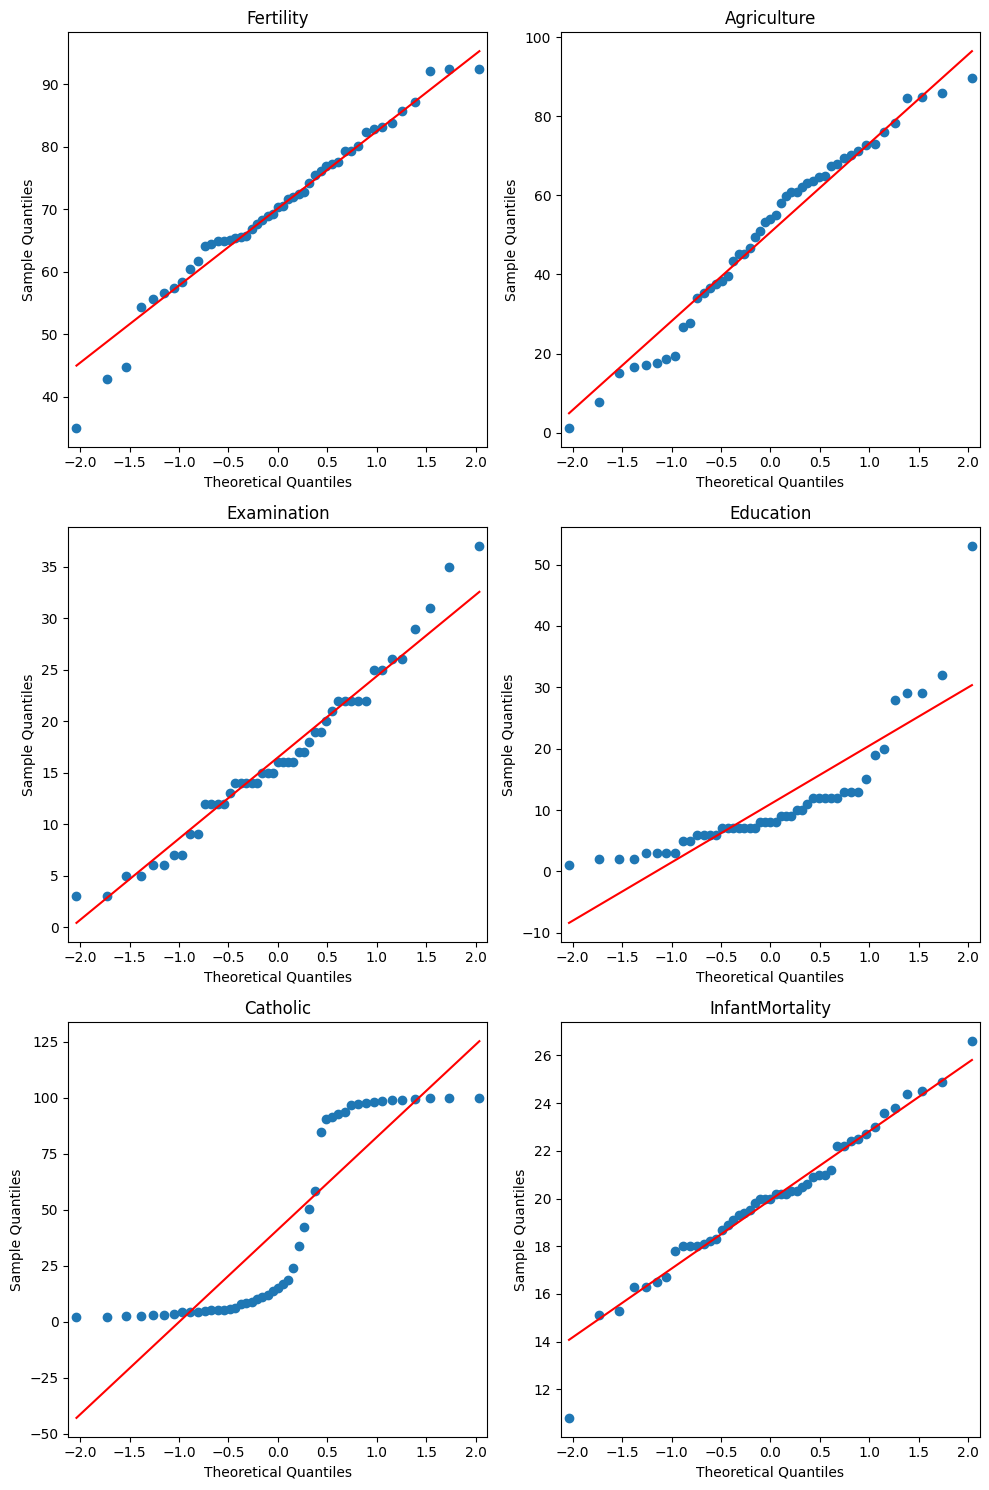

In [ ]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

num_cols = len(df.columns)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 2, figsize=(10, num_rows*5))  # Create subplots

for idx, col in enumerate(df.columns):
    row_idx = idx // 2
    col_idx = idx % 2
    ax = axes[row_idx, col_idx]

    qqplot(df[col], line='s', ax=ax)
    ax.set_title(col)

# Remove any unused subplots
for i in range(num_rows * 2 - num_cols):
    fig.delaxes(axes.flatten()[num_cols + i])

plt.tight_layout()
plt.show()


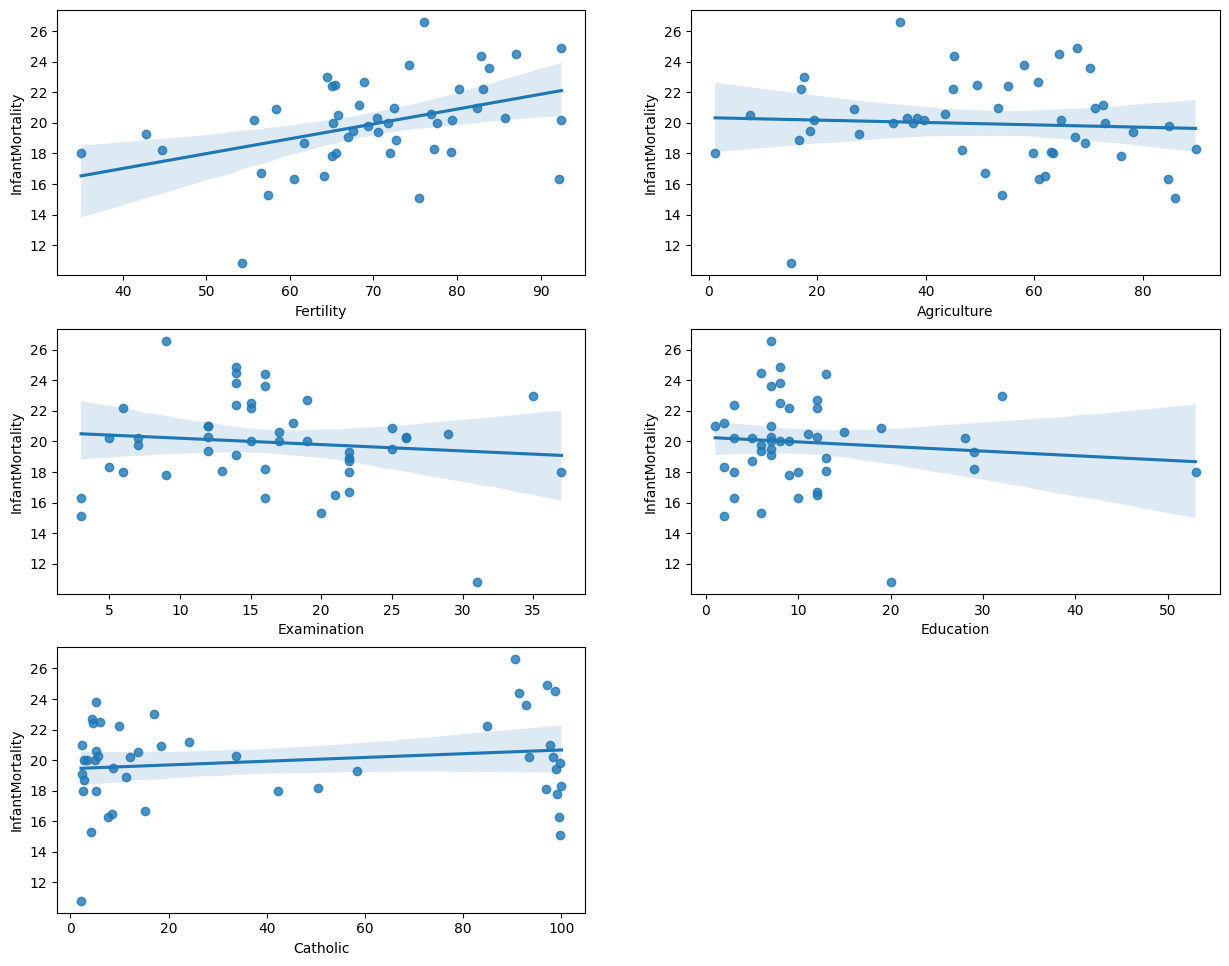

In [ ]:
# Plotting Scatterplot in order to know the relatoin between Infant Mortality with Independent variables
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 20))

cnt = 1
for col in df.columns:
    if (col == 'InfantMortality'):
        continue

    plt.subplot(5, 2, cnt)
    lmgraph = sns.regplot(x = df[col], y = df.InfantMortality)
    lmgraph.set_xlabel(col)
    lmgraph.set_ylabel('InfantMortality')
    cnt += 1


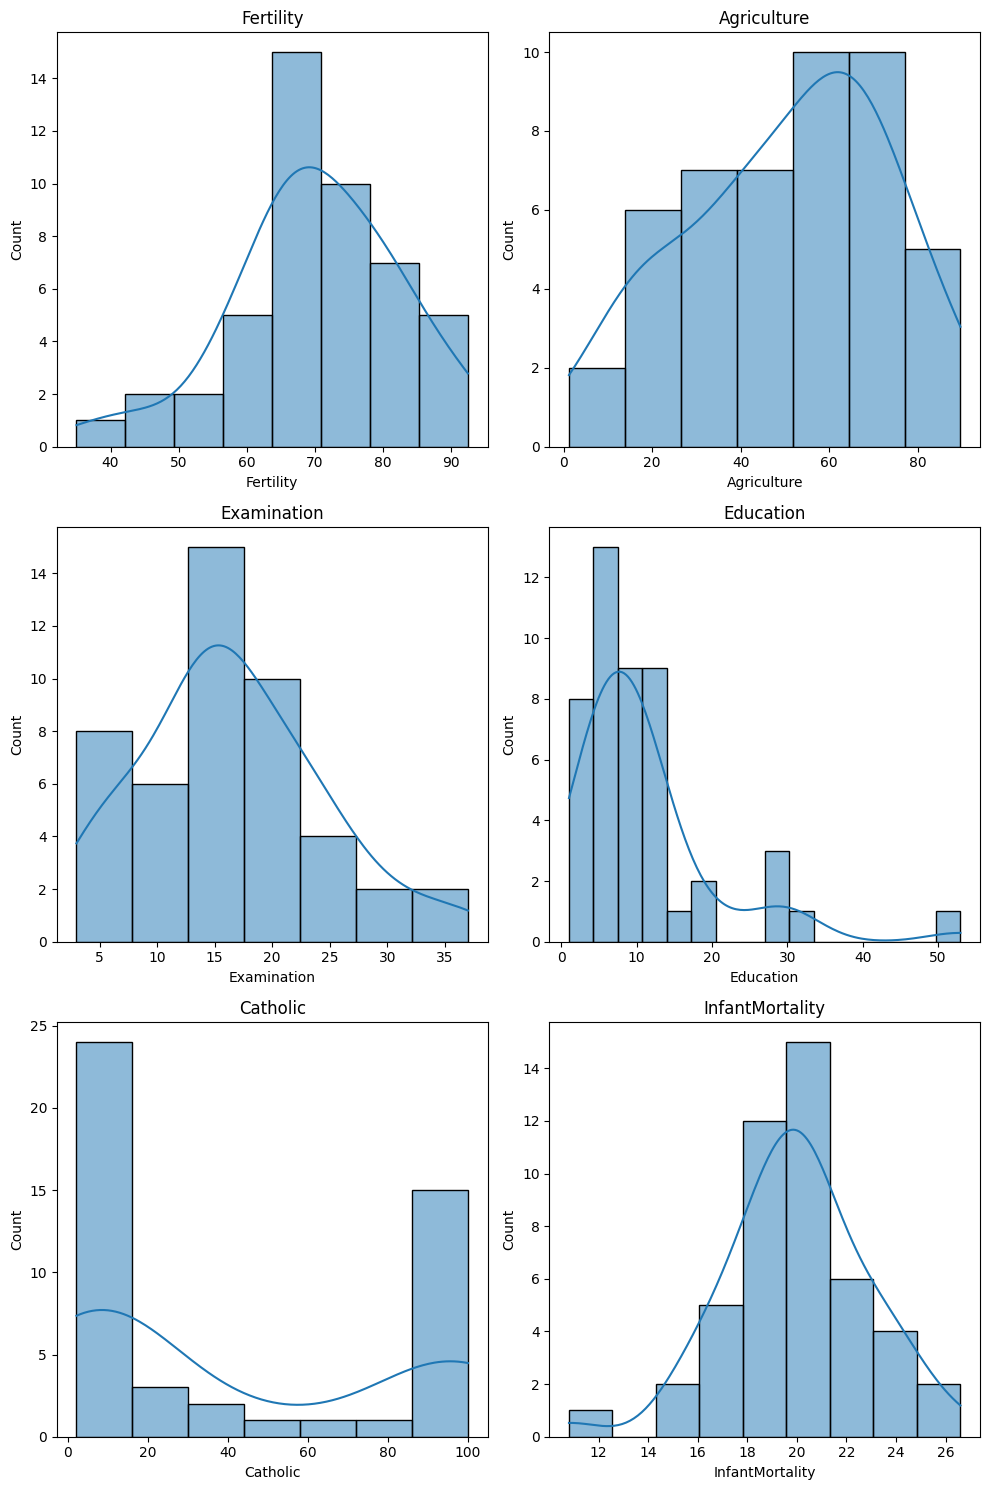

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

num_cols = len(df.columns)
num_rows = (num_cols + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(10, num_rows*5))

for idx, col in enumerate(df.columns):
    row_idx = idx // 2
    col_idx = idx % 2
    ax = axes[row_idx, col_idx]

    lmgraphhist = sns.histplot(x=df[col], kde=True, ax=ax)
    lmgraphhist.set_title(col)

for i in range(num_rows * 2 - num_cols):
    fig.delaxes(axes.flatten()[num_cols + i])

plt.tight_layout()
plt.show()


<Axes: >

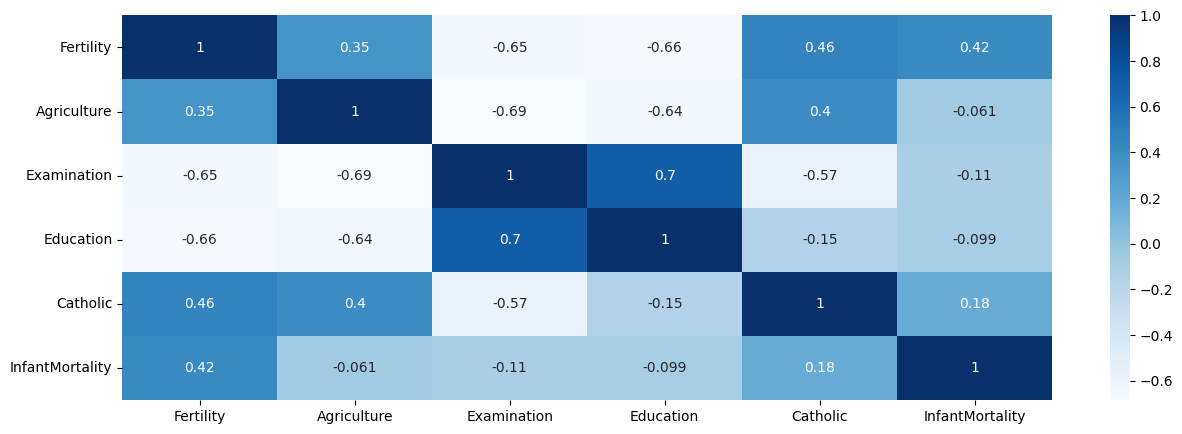

In [ ]:
#Visualization of Correlations
fig = plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

In [ ]:
#Create x and y variables
x = df.drop('InfantMortality',axis=1).to_numpy()
y = df['InfantMortality'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [ ]:
#Script for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

for name,method in [('Linear Regression', LinearRegression())]:
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('Method: {}'.format(name))

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),
                         df.drop('InfantMortality',axis=1).columns,columns=['Coefficients'])
print('\n')
print(coeff_table)

#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(r2_score(y_test, predict)))
adjusted_r_squared2 = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))

print('\nMean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict))))

Method: Linear Regression

Intercept: 19.81


             Coefficients
Fertility        2.567064
Agriculture      0.500710
Examination      0.729700
Education        1.118652
Catholic        -0.636301

R2: -0.30
Adj_R2: -0.46

Mean Absolute Error: 2.49
Mean Squared Error: 10.54
Root Mean Squared Error: 3.25


In [ ]:
#Forecast Table
predict2 = predict.T
diff = predict2-y_test
FcstTble=pd.DataFrame({'Actual':y_test,'Predicted':predict2.round(2),'Difference':diff.round(2)})
print('\nForecast Table')
FcstTble.head()


Forecast Table


,Actual,Predicted,Difference
0,23.6,21.60,-2.00
1,20.2,19.20,-1.00
2,18.0,19.81,1.81
3,19.5,19.19,-0.31
4,18.9,20.57,1.67
